In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def closest_centroid(X, centroids):
    """ Return an array containing the index of the closest centroid to each data point in X """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(X, closest, centroids):
    """ Update the centroids based on the mean of the points closest to them """
    return np.array([X[closest == k].mean(axis=0) for k in range(centroids.shape[0])])

def k_means(X, k, max_iter=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iter):
        closest = closest_centroid(X, centroids)
        new_centroids = move_centroids(X, closest, centroids)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, closest

In [5]:
# Example usage
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
k = 2

centroids, closest = k_means(X, k)

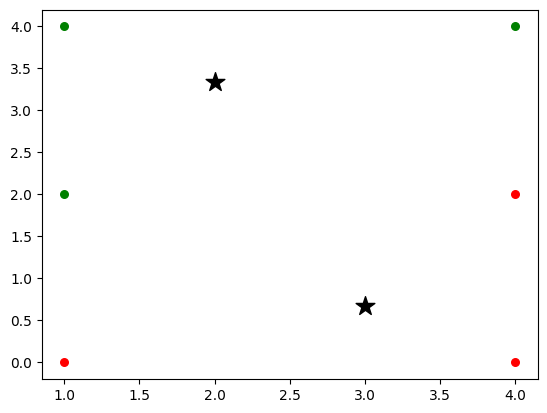

In [6]:
# Plot the results
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    plt.scatter(X[closest == i, 0], X[closest == i, 1], s=30, c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k')
plt.show()